 [-----------------100%-----------------] 2000 of 2000 complete in 27.3 sec

/Users/peadarcoyle/anaconda/lib/python3.4/importlib/_bootstrap.py:321: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility
  return f(*args, **kwds)


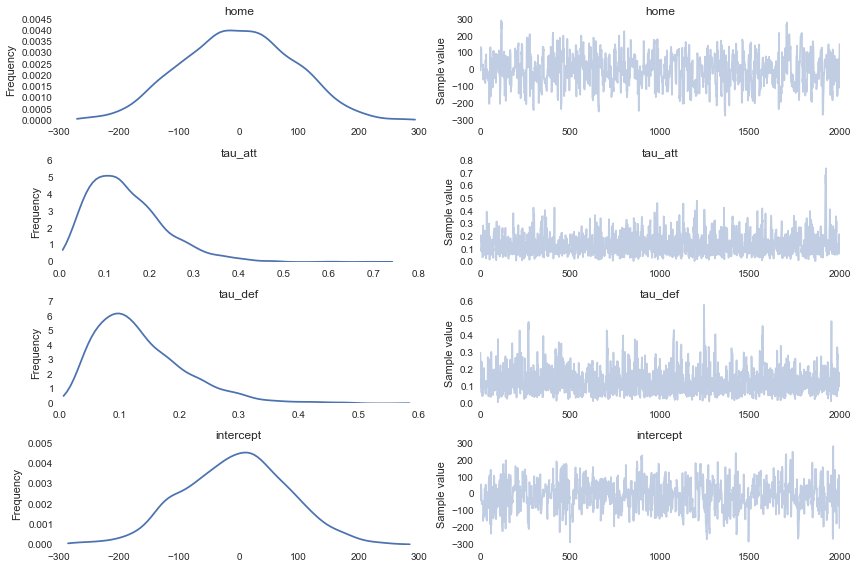

In [28]:
import os
import math
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm3# I know folks are switching to "as pm" but I'm just not there yet
%matplotlib inline
import seaborn as sns
from IPython.core.pylabtools import figsize
import seaborn as sns
import theano.tensor as T
figsize(12, 12)
DATA_DIR = os.path.join(os.getcwd(), 'data/')
data_file = DATA_DIR + 'results_2014.csv'

df = pd.read_csv(data_file, sep=',')
# Or whatever it takes to get this into a data frame.
teams = df.home_team.unique()
teams = pd.DataFrame(teams, columns=['team'])
teams['i'] = teams.index
df = pd.merge(df, teams, left_on='home_team', right_on='team', how='left')
df = df.rename(columns = {'i': 'i_home'}).drop('team', 1)
df = pd.merge(df, teams, left_on='away_team', right_on='team', how='left')
df = df.rename(columns = {'i': 'i_away'}).drop('team', 1)
observed_home_goals = df.home_score.values
observed_away_goals = df.away_score.values
home_team = df.i_home.values
away_team = df.i_away.values
num_teams = len(df.i_home.drop_duplicates())
num_games = len(home_team)
g = df.groupby('i_away')
att_starting_points = np.log(g.away_score.mean())
g = df.groupby('i_home')
def_starting_points = -np.log(g.away_score.mean())

import theano.tensor as T
import pymc3 as pm3
#hyperpriors

'''
def atts3(atts_star3=atts_star3):
    atts3 = atts_star.copy()
    atts3 = atts3 - np.mean(atts_star)
    return atts3
def defs3(defs_star3=defs_star3):
    defs3 = defs_star3.copy()
    defs3 = defs3 - np.mean(defs_star3)
    return defs
    '''
model = pm3.Model()
with pm3.Model() as model:
    home3 = pm3.Normal('home', 0, .0001)
    tau_att3 = pm3.Gamma('tau_att', .1, .1)
    tau_def3 = pm3.Gamma('tau_def', .1, .1)
    intercept3 = pm3.Normal('intercept', 0, .0001)
    #team-specific parameters
    atts_star3 = pm3.Normal("atts_star", 
                        mu=0, 
                        tau=tau_att3, 
                        shape=num_teams, 
                        observed=att_starting_points.values)
    defs_star3 = pm3.Normal("defs_star", 
                        mu=0, 
                        tau=tau_def3, 
                        shape=num_teams, 
                        observed=def_starting_points.values) 

    
    #home_theta3 = atts3 + defs3
    #away_theta3 = atts3 + defs3
    # Unknown model parameters
    home_points3 = pm3.Poisson('home_points', mu=1, observed=observed_home_goals)
    away_points3 = pm3.Poisson('away_points', mu=1, observed=observed_away_goals)
    start = pm3.find_MAP()
    step = pm3.NUTS(state=start)
    trace = pm3.sample(2000, step, start=start, progressbar=True)

    pm3.traceplot(trace)